## Introduction to Plyto for Data Exploration
Currently Plyto provides two functions to check your Pandas DataFrame for abnormalities as well as further explore specific columns.

In [1]:
from plyto import CheckData, CheckColumn
import pandas as pd
data = pd.read_csv('titanic3.csv')

Using TensorFlow backend.


In [2]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

#### Check Data

The CheckData function looks for abnormalties in data columns. The function must take in a dataframe, and has optional parameters to specify which columns to check and cutoff points for what you consider abnormal in your data.

Below is an example of the CheckData function specifying columns, a cutoff point for proportion of missing or zero values that I consider abnormal (0.10), a cutoff point for high cardinality of categorical data, a cutoff point for high frequency of floating point numbers, and a cutoff point for low frequency of categories in categorical data. Another option that this function has is to specify your own outlier function that should take in the dataset and column name and output a lower limit and an upper limit for outliers. By default, the outlier function has lower and upper limits of 1.5*IQR above the third quartile and below the first quartile.

In [3]:
CheckData(data, columns=['sex','survived','parch','age'], 
          missing=0.10, cardinality=25, floatFrequency=45, catFrequency=150)

survived: 
- high proportion of zero values at 61.76%
- high frequency of floating point numbers with 2 number(s) having frequency over 45

parch: 
- high proportion of zero values at 76.49%
- high frequency of floating point numbers with 3 number(s) having frequency over 45
- high number of outliers with 307 high outliers and 0 low outliers

age: 
- high proportion of null values at 20.15%
- high frequency of floating point numbers with 1 number(s) having frequency over 45

#### Check Column(s)

The CheckColumn function gives you a more detailed look on one or more columns of the DataFrame with summary statistics, a plot of the column's distribution, and the same abnormality details given by the CheckData function. The DataFrame and either a single column name or list of column names are required parameters. Optional parameters include all those used in CheckData as well as bins, which specifies the maximum number of bins in the distribution plot if the plot is of quantitative data.

From the CheckData call above, we found that the *parch* column (the number of parents / children an individual had aboard) has high outliers. Below we inspect this column further with CheckColumn.

###### Column Summary: Parch

,count,mean,std,min,25%,50%,75%,max
parch,1309.0,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0


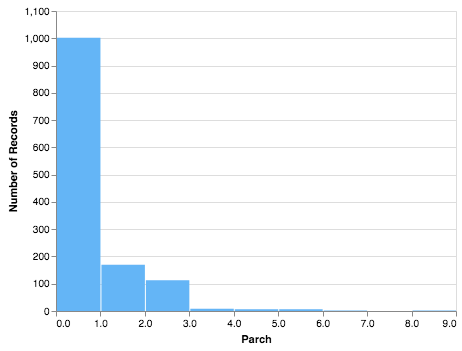


- high proportion of zero values at 76.49%
- high frequency of floating point numbers with 3 number(s) having frequency over 45
- high number of outliers with 307 high outliers and 0 low outliers

In [4]:
CheckColumn(data, 'parch', bins=15, missing=0.10, cardinality=25, floatFrequency=45, catFrequency=150)

After observing this column more carefully, we can conclude that the high outliers make sense, and they are only considered outliers because of how many individuals traveled without any parents or children.

No abnormalities were found in the sex column, but if you were still curious about its distribution you could check both of these columns in one function call.

###### Column Summary: Parch

,count,mean,std,min,25%,50%,75%,max
parch,1309.0,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0


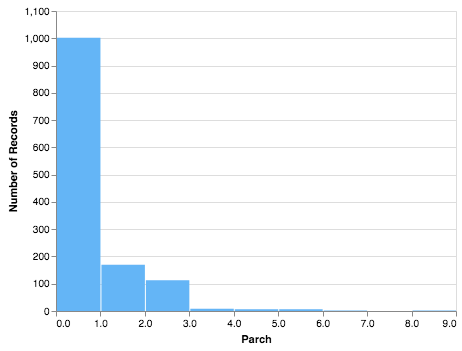


- high proportion of zero values at 76.49%
- high frequency of floating point numbers with 3 number(s) having frequency over 45
- high number of outliers with 307 high outliers and 0 low outliers

###### Column Summary: Sex

sex,female,male
count,466.000000,843.000000
prop,0.355725,0.643511


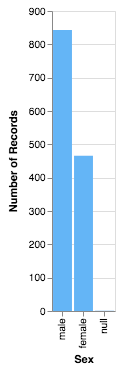

No abnormalities found

In [5]:
CheckColumn(data, ['parch', 'sex'], bins=[15, False], missing=0.10, cardinality=25, floatFrequency=45, catFrequency=150)